# Läsionsmaske erstellen

In [2]:
import os
import sys
import numpy as np

In [5]:
data = np.load('../datasets/Simulated_Lesion_GT/data.npy')
data_ft =  np.fft.fftshift(np.fft.fft(data, axis=3), axes=3)

In [43]:
# |data| im relevanten Frequenzfenster (Index 95–105)
window = np.abs(data_ft[:, :, :, 95:106, :])

# Maximum über Fenster (axis=3) und Wiederholungen (axis=4)
max_vals = window.max(axis=(3, 4))

# Binäre Maske mit Schwellwert 1
mask = (max_vals > 1.9).astype(np.uint8)  # Shape: (22, 22, 21)

In [44]:
# Nun noch sinnlose x<9 auf 0 setzen
mask[:,:8,...]= 0

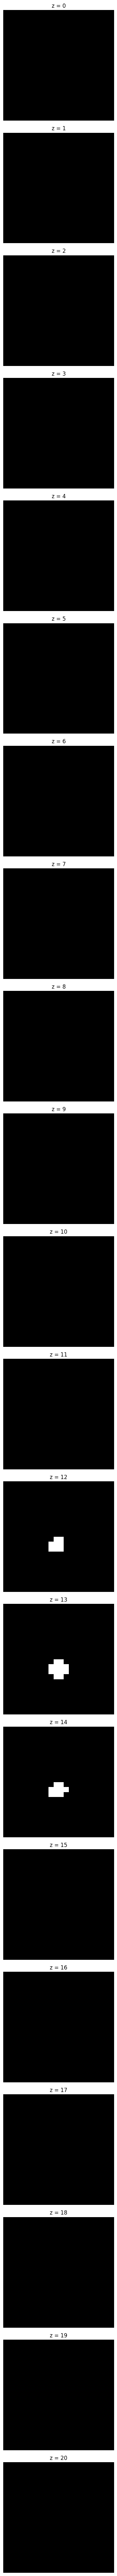

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(21, 1, figsize=(5, 80))  # Breite=5, Höhe=80

for z in range(21):
    ax = axes[z]
    ax.imshow(mask[:, :, z], cmap="gray", origin="lower")
    ax.set_title(f"z = {z}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [48]:
# neuen array nu rmit lesion voxel erstellen

import numpy as np

# data: (X,Y,Z,t,T), mask: (X,Y,Z) mit 1 innerhalb der Läsion
X, Y, Z, t, T = data.shape

# Indizes aller Läsions-Voxel
lesion_idx = np.argwhere(mask == 1)
if lesion_idx.size == 0:
    raise ValueError("Maske enthält keine Läsions-Voxel (==1).")

# Für jede räumliche Position einen zufälligen Läsions-Index ziehen (mit Zurücklegen)
sel = np.random.randint(0, len(lesion_idx), size=(X, Y, Z))

# Quellkoordinaten (je (X,Y,Z))
src_x = lesion_idx[sel, 0]
src_y = lesion_idx[sel, 1]
src_z = lesion_idx[sel, 2]

# Zusammenbauen: jedes Zielvoxel bekommt die (t,T)-Daten seines zufällig gewählten Läsionsvoxels
lesion = data[src_x, src_y, src_z, :, :]   # Shape: (X, Y, Z, t, T)
lesion_ft = np.fft.fftshift(np.fft.fft(lesion, axis=3), axes=3)

In [ ]:
lesion

(22, 22, 21, 120, 8)